In [24]:
import os
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.SeqUtils import gc_fraction
from glob import glob
import matplotlib.pyplot as plt

In [20]:
genomes= "/home/infosebi/Documents/Programmieren/MastersProject/genomes"
file_names=glob('%s/*.gbff'%genomes)
outputfile='/home/infosebi/Documents/Programmieren/MastersProject/clusters.fasta'

In [21]:
proteins=[]
GC_contents = {}
for genbank_file in file_names:
    for gb_obj in SeqIO.parse(genbank_file,'genbank'):
        genome_name = os.path.basename(genbank_file).split('.gbff')[0]
        GC_contents[genome_name] = gc_fraction(gb_obj.seq)
        for feature in gb_obj.features:
             if feature.type == "CDS":
                protein = SeqRecord(Seq(feature.qualifiers['translation'][0]), id=feature.qualifiers['locus_tag'][0], description='')
                proteins.append(protein)

In [36]:
SeqIO.write(proteins,outputfile,'fasta')

47019

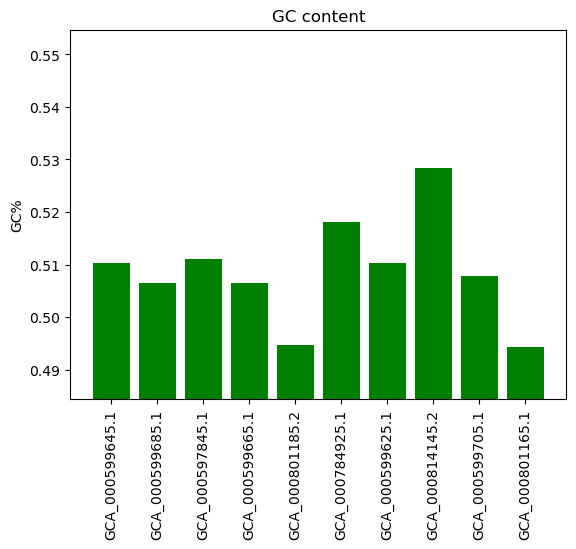

In [46]:
plt.bar(*zip(*GC_contents.items()), color = "green")
plt.title('GC content')
plt.xticks(rotation='vertical')
plt.ylabel('GC%')
plt.axis(ymin=min(GC_contents.values())-0.01)
plt.savefig(f'{genomes}/GC%.png')

In [6]:
#make database to be sure
!diamond cluster --db clusters.fasta --threads 8 --evalue 0.00001 --approx-id 50.0 --member-cover 50.0 --out clusters.txt --cluster-steps faster sensitive ultra-sensitive   

diamond v2.1.8.162 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 8
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Opening the input file...  [0.048s]
Input database: clusters.fasta (47019 sequences, 14284389 letters)
Temporary directory: 
#Target sequences to report alignments for: unlimited
Database: clusters.fasta (type: FASTA file, sequences: 47019, letters: 14284389)
Block size = 3200000000
Opening the input file...  [0s]
Opening the output file...  [0s]
Seeking in database...  [0s]
Loading query sequences...  [0.055s]
Algorithm: Double-indexed
Building query histograms...  [0.53s]
Seeking in database...  [0.043s]
Initializing temporary storage...  [0s]
Building reference histograms...  [0.266s]
Allocating buffers...  [0.001s]
Processi

Searching alignments...  [0.02s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 5/16, index chunk 4/4.
Building reference seed array...  [0.05s]
Building query seed array...  [0.049s]
Computing hash join...  [0.018s]
Masking low complexity seeds...  [0.015s]
Searching alignments...  [0.026s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 6/16, index chunk 1/4.
Building reference seed array...  [0.048s]
Building query seed array...  [0.045s]
Computing hash join...  [0.016s]
Masking low complexity seeds...  [0.017s]
Searching alignments...  [0.021s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 6/16, index chunk 2/4.
Building reference seed array...  [0.054s]
Building query seed array...  [0.047s]
Computing hash join...  [0.014s]
Masking low complexity seeds...  [0.013s]
Searching alignments...  [0.02s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape

Searching alignments...  [0.083s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 7/64.
Building reference seed array...  [0.058s]
Building query seed array...  [0.062s]
Computing hash join...  [0.06s]
Masking low complexity seeds...  [0.042s]
Searching alignments...  [0.072s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 8/64.
Building reference seed array...  [0.05s]
Building query seed array...  [0.051s]
Computing hash join...  [0.058s]
Masking low complexity seeds...  [0.043s]
Searching alignments...  [0.075s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 9/64.
Building reference seed array...  [0.058s]
Building query seed array...  [0.045s]
Computing hash join...  [0.058s]
Masking low complexity seeds...  [0.044s]
Searching alignments...  [0.078s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 10/64.
Building reference seed array...  [0.048s]

Building reference seed array...  [0.057s]
Building query seed array...  [0.063s]
Computing hash join...  [0.068s]
Masking low complexity seeds...  [0.048s]
Searching alignments...  [0.084s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 37/64.
Building reference seed array...  [0.055s]
Building query seed array...  [0.055s]
Computing hash join...  [0.061s]
Masking low complexity seeds...  [0.046s]
Searching alignments...  [0.088s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 38/64.
Building reference seed array...  [0.053s]
Building query seed array...  [0.059s]
Computing hash join...  [0.061s]
Masking low complexity seeds...  [0.048s]
Searching alignments...  [0.073s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 39/64.
Building reference seed array...  [0.037s]
Building query seed array...  [0.045s]
Computing hash join...  [0.054s]
Masking low complexity seeds...  [0.042s]
Sea

Computing alignments...  [2.087s]
Deallocating buffers...  [0s]
Loading trace points...  [0s]
 [2.147s]
Deallocating reference...  [0s]
Loading reference sequences...  [0s]
Deallocating buffers...  [0s]
Deallocating queries...  [0s]
Closing the output file...  [0s]
Closing the database...  [0s]
Cleaning up...  [0s]
Total time = 23.865s
Reported 33 pairwise alignments, 33 HSPs.
33 queries aligned.
Finished search. #Edges: 60
Allocating buffers...  [0s]
Loading edges...  [0s]
Sorting edges...  [0s]
Computing edge counts...  [0.006s]
Computing vertex cover...  [0.017s]
Computing reassignment...  [0s]
Computing merges...  [0s]
Clustering round 3 complete. #Input sequences: 6711 #Clusters: 6701 Time: 23s
Generating output...  [0.04s]


In [8]:
!diamond recluster --db clusters.fasta --threads 8 --evalue 0.00001 --approx-id 50.0 --member-cover 50.0 --clusters clusters.txt --out reclusters.txt --cluster-steps faster sensitive ultra-sensitive   

diamond v2.1.8.162 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 8
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Coverage cutoff: 50%
Opening the database...  [0.069s]
#Database sequences: 47019, #Letters: 14284389
Reading the input file...  [0.021s]
*** Initializing recluster iteration 1...  [0.01s]
Block size: 8000000000 byte.
Loading centroid block...  [0.06s]
Processing centroid block 1, member block 1...  [5.008s]
Joining centroid block 1...  [0.021s]
Reported 0 pairwise alignments, 0 HSPs.
0 queries aligned.
Creating database of unaligned sequences...  [0.109s]
#Sequences that failed to align against assigned centroid: 575
Creating centroid database...  [0.117s]
Temporary directory: 
Running iterated search mode with sensitivity ste

Building reference seed array...  [0.059s]
Building query seed array...  [0.008s]
Computing hash join...  [0.012s]
Masking low complexity seeds...  [0.004s]
Searching alignments...  [0.009s]
Deallocating memory...  [0s]
Processing query block 1, query iteration 4, reference block 1/1, shape 13/16.
Building reference seed array...  [0.058s]
Building query seed array...  [0.006s]
Computing hash join...  [0.013s]
Masking low complexity seeds...  [0.001s]
Searching alignments...  [0.009s]
Deallocating memory...  [0s]
Processing query block 1, query iteration 4, reference block 1/1, shape 14/16.
Building reference seed array...  [0.067s]
Building query seed array...  [0.008s]
Computing hash join...  [0.012s]
Masking low complexity seeds...  [0.005s]
Searching alignments...  [0.009s]
Deallocating memory...  [0s]
Processing query block 1, query iteration 4, reference block 1/1, shape 15/16.
Building reference seed array...  [0.054s]
Building query seed array...  [0.004s]
Computing hash join..

Searching alignments...  [0.011s]
Deallocating memory...  [0s]
Processing query block 1, query iteration 5, reference block 1/1, shape 49/64.
Building reference seed array...  [0.053s]
Building query seed array...  [0.008s]
Computing hash join...  [0.013s]
Masking low complexity seeds...  [0.003s]
Searching alignments...  [0.014s]
Deallocating memory...  [0s]
Processing query block 1, query iteration 5, reference block 1/1, shape 50/64.
Building reference seed array...  [0.052s]
Building query seed array...  [0.006s]
Computing hash join...  [0.012s]
Masking low complexity seeds...  [0.002s]
Searching alignments...  [0.01s]
Deallocating memory...  [0s]
Processing query block 1, query iteration 5, reference block 1/1, shape 51/64.
Building reference seed array...  [0.055s]
Building query seed array...  [0.005s]
Computing hash join...  [0.01s]
Masking low complexity seeds...  [0.002s]
Searching alignments...  [0.009s]
Deallocating memory...  [0s]
Processing query block 1, query iteration 

Searching alignments...  [0.001s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 9/16, index chunk 2/4.
Building reference seed array...  [0.001s]
Building query seed array...  [0.001s]
Computing hash join...  [0s]
Masking low complexity seeds...  [0.001s]
Searching alignments...  [0.001s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 9/16, index chunk 3/4.
Building reference seed array...  [0.002s]
Building query seed array...  [0.001s]
Computing hash join...  [0s]
Masking low complexity seeds...  [0s]
Searching alignments...  [0.001s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 9/16, index chunk 4/4.
Building reference seed array...  [0.001s]
Building query seed array...  [0.001s]
Computing hash join...  [0.001s]
Masking low complexity seeds...  [0s]
Searching alignments...  [0.001s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 10/16, index

Computing alignments...  [0.027s]
Deallocating buffers...  [0s]
Loading trace points...  [0s]
 [0.034s]
Deallocating reference...  [0s]
Loading reference sequences...  [0s]
Deallocating buffers...  [0s]
Deallocating queries...  [0s]
Closing the output file...  [0s]
Closing the database...  [0s]
Cleaning up...  [0s]
Total time = 0.834s
Reported 6 pairwise alignments, 6 HSPs.
4 queries aligned.
Finished search. #Edges: 12
Allocating buffers...  [0s]
Loading edges...  [0s]
Sorting edges...  [0s]
Computing edge counts...  [0s]
Computing vertex cover...  [0s]
Computing reassignment...  [0s]
Clustering round 2 complete. #Input sequences: 79 #Clusters: 74 Time: 0s
Temporary directory: 
#Target sequences to report alignments for: unlimited
Database: clusters.fasta (type: FASTA file, sequences: 458, letters: 141202)
Block size = 400000000
Opening the input file...  [0s]
Opening the output file...  [0s]
Seeking in database...  [0s]
Loading query sequences...  [0.001s]
Algorithm: Double-indexed
B

Building query seed array...  [0.001s]
Computing hash join...  [0.001s]
Masking low complexity seeds...  [0.001s]
Searching alignments...  [0.002s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 27/64.
Building reference seed array...  [0.001s]
Building query seed array...  [0.001s]
Computing hash join...  [0.001s]
Masking low complexity seeds...  [0.001s]
Searching alignments...  [0.001s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 28/64.
Building reference seed array...  [0.001s]
Building query seed array...  [0.002s]
Computing hash join...  [0.001s]
Masking low complexity seeds...  [0.001s]
Searching alignments...  [0.001s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 29/64.
Building reference seed array...  [0.001s]
Building query seed array...  [0.001s]
Computing hash join...  [0.001s]
Masking low complexity seeds...  [0.001s]
Searching alignments...  [0.001s]
Deallocating

Searching alignments...  [0.002s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 56/64.
Building reference seed array...  [0.001s]
Building query seed array...  [0.001s]
Computing hash join...  [0.001s]
Masking low complexity seeds...  [0.001s]
Searching alignments...  [0.001s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 57/64.
Building reference seed array...  [0.001s]
Building query seed array...  [0.001s]
Computing hash join...  [0.001s]
Masking low complexity seeds...  [0s]
Searching alignments...  [0.002s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 58/64.
Building reference seed array...  [0.001s]
Building query seed array...  [0.003s]
Computing hash join...  [0.001s]
Masking low complexity seeds...  [0s]
Searching alignments...  [0.002s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 59/64.
Building reference seed array...  [0.001s]
Bu